# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [3]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [4]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [5]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

## Relationships

[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or [Pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid). 

![https://commons.wikimedia.org/wiki/File:Strong--weak--no-correlation.png](../images/correlation.png "Title")

In [6]:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numeric_data = data._get_numeric_data()


In [7]:
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
numeric_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Months_on_book',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

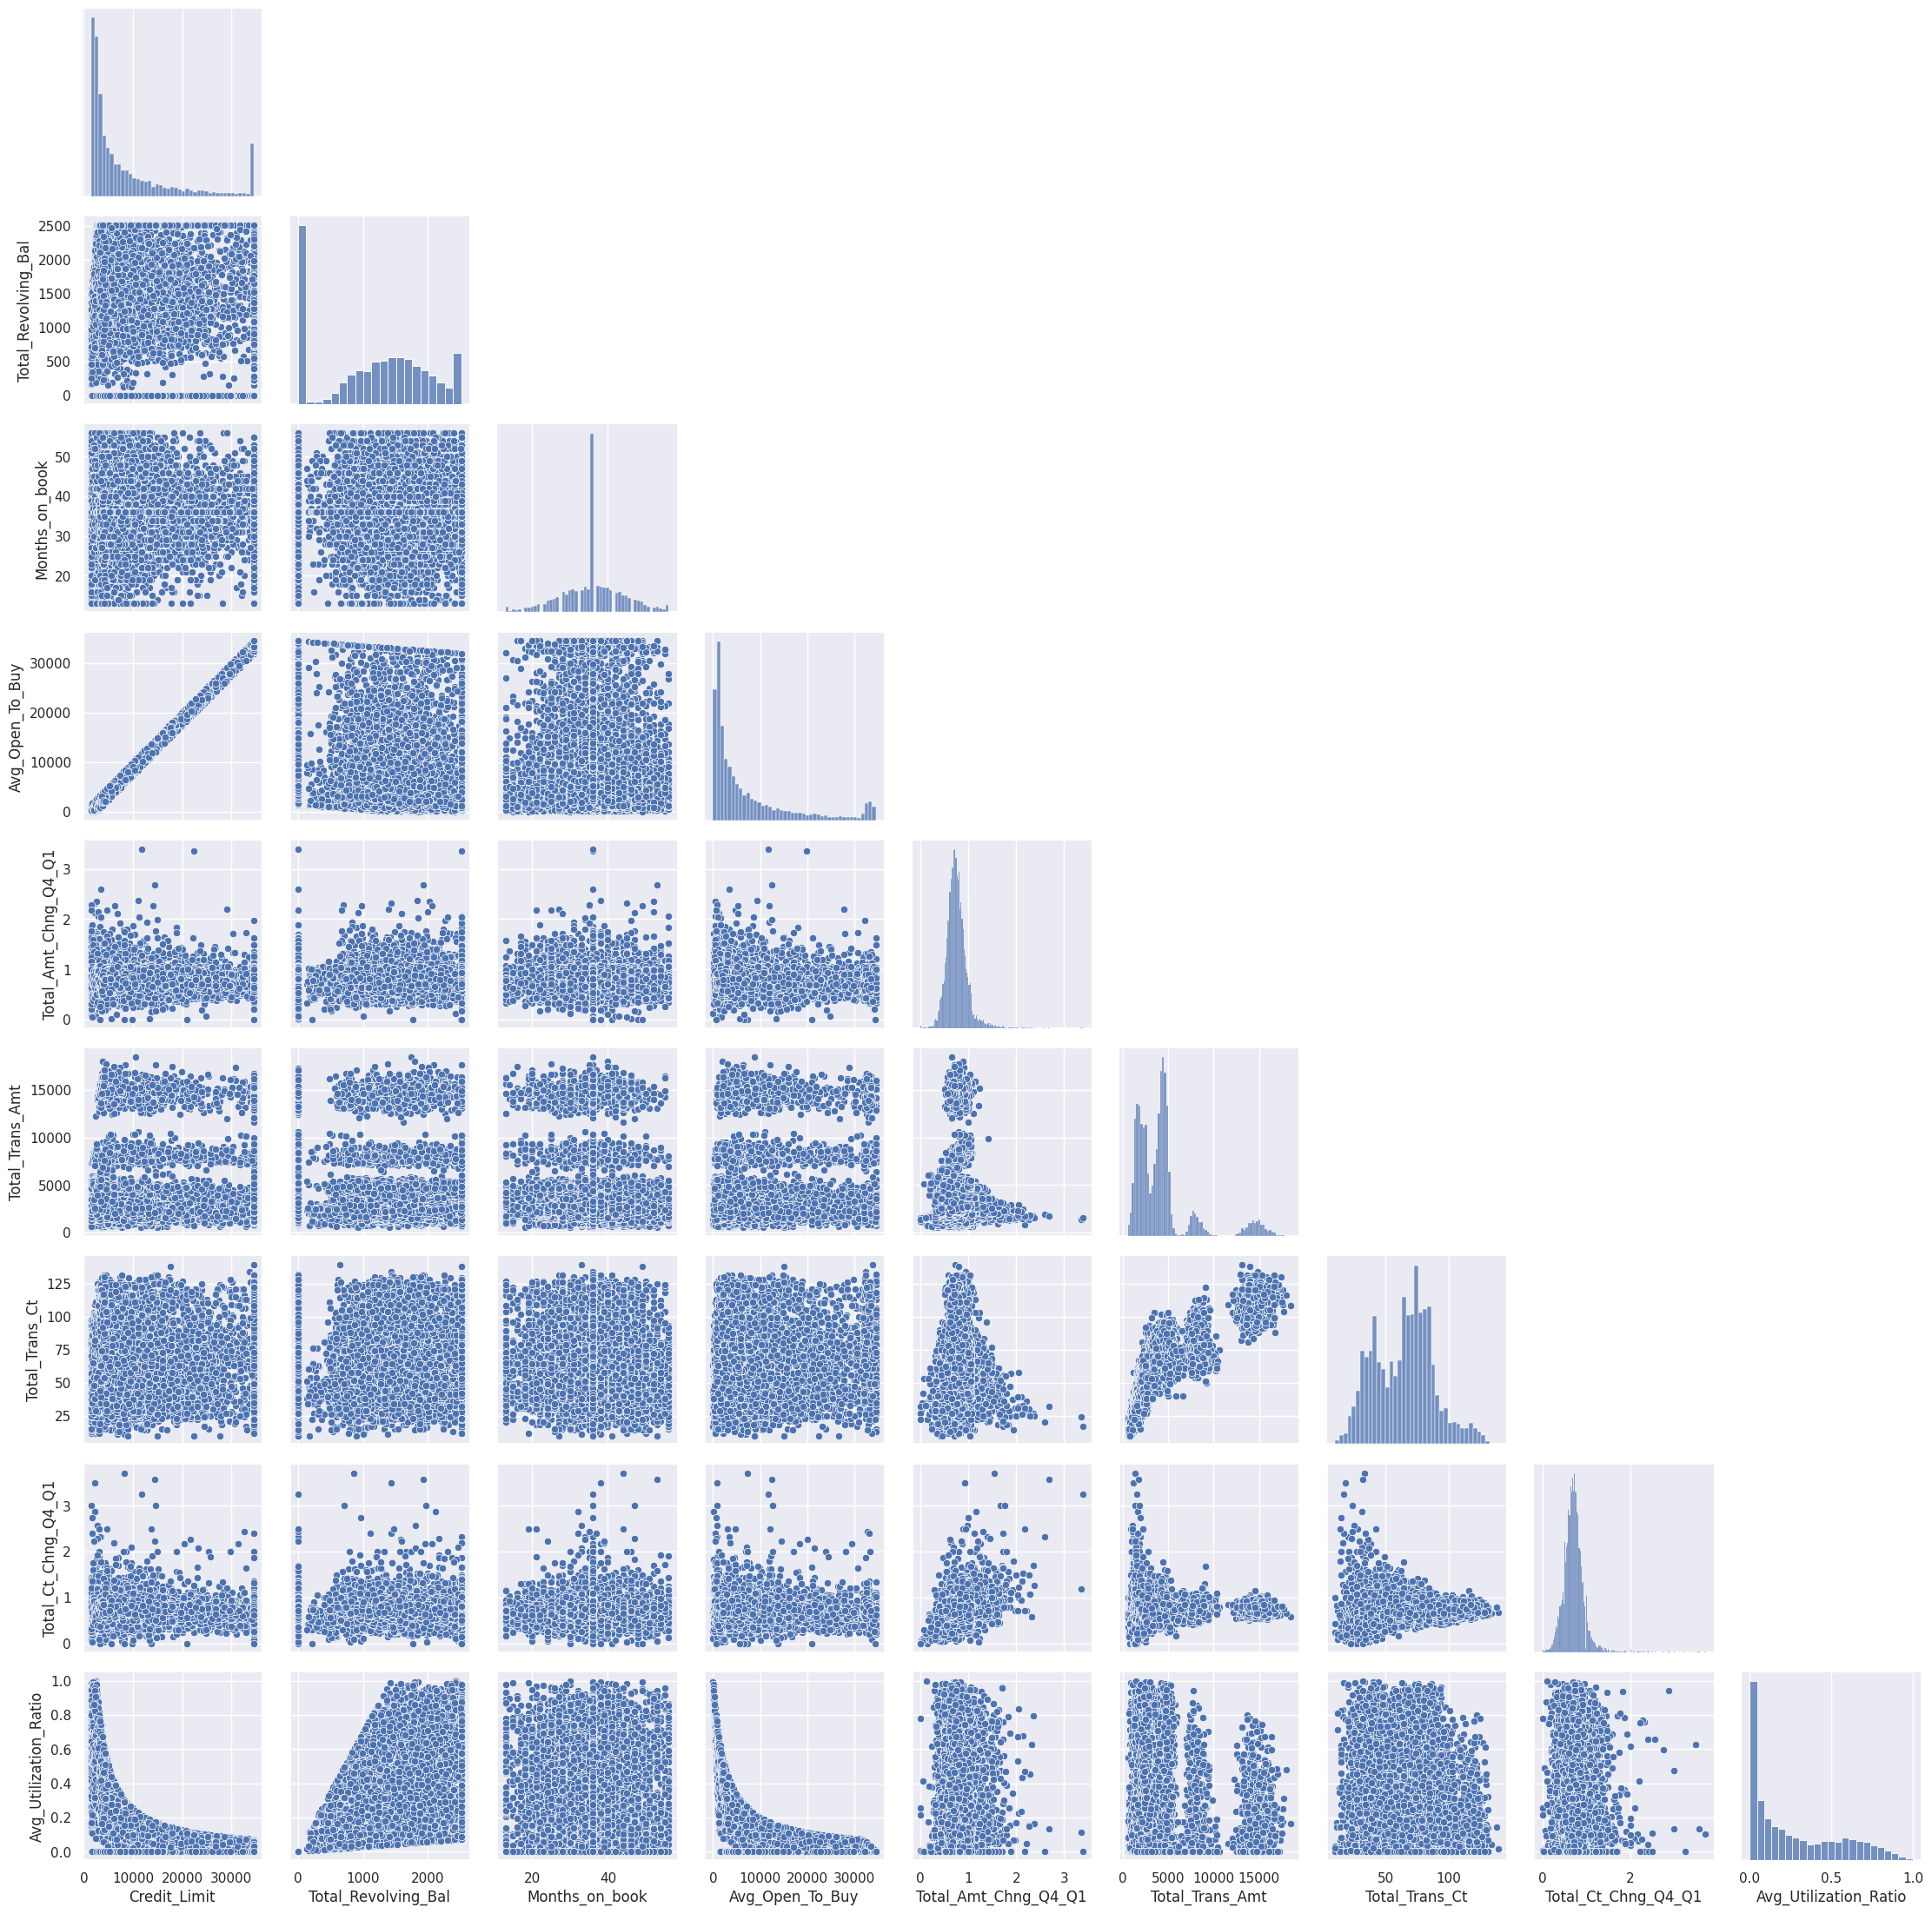

In [10]:
g = sns.PairGrid(numeric_data, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

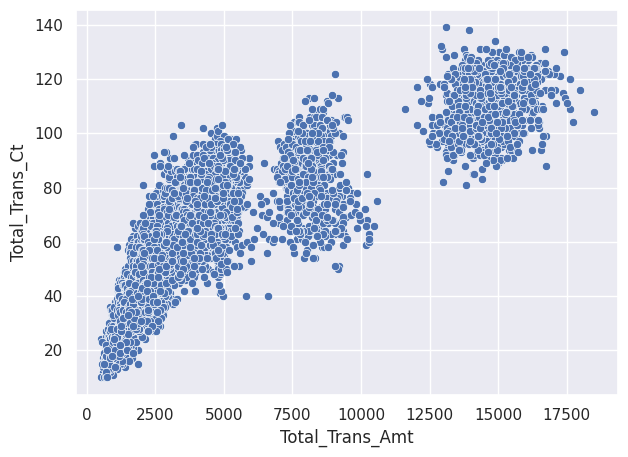

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct', data=data)

<Axes: xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

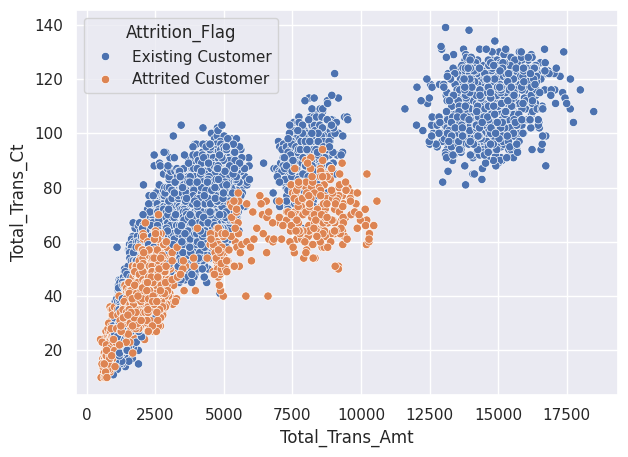

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Total_Trans_Amt',y='Total_Trans_Ct',hue='Attrition_Flag' ,data=data)

**Finding #1:**